bug
0    579
1    166
Name: count, dtype: int64
After SMOTE-Tomek resampling:
bug
1    567
0    567
Name: count, dtype: int64
Accuracy Score: 0.7136563876651982
Confusion Matrix:
[[84 36]
 [29 78]]


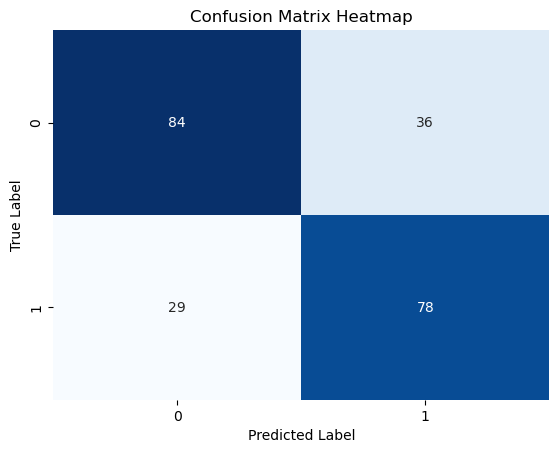

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       120
           1       0.68      0.73      0.71       107

    accuracy                           0.71       227
   macro avg       0.71      0.71      0.71       227
weighted avg       0.72      0.71      0.71       227



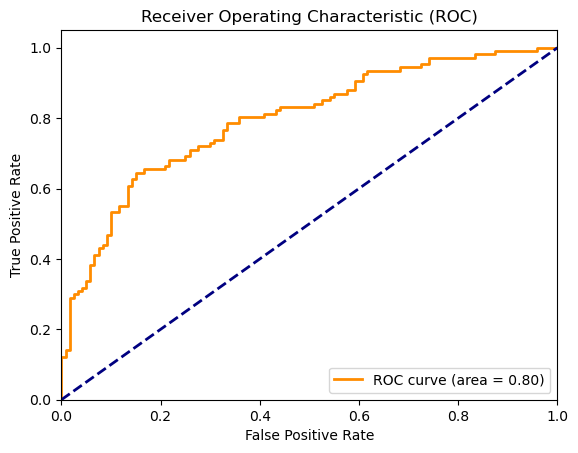

Area Under Curve (AUC): 0.7965732087227414


In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek

# 1. Load the dataset
file_path = 'antfile17.csv'
data = pd.read_csv(file_path)

# 2. Check for imbalance in the 'bug' column (last column)
print(data['bug'].value_counts())

# 3. Apply SMOTE-Tomek if the data is imbalanced
X = data.iloc[:, :-1]  # Features (first 20 columns)
y = data.iloc[:, -1]   # Target (last column - 'bug')

smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Check the new distribution after resampling
print("After SMOTE-Tomek resampling:")
print(pd.Series(y_resampled).value_counts())

# 4. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 5. Perform scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Develop logistic regression model and perform prediction
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 7. Model evaluation using confusion matrix and accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 8. Visualizing confusion matrix using heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 9. Build classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# 10. Build ROC curve and calculate AUC score
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print(f"Area Under Curve (AUC): {roc_auc}")
